In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Linear SVM Classification

In [3]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

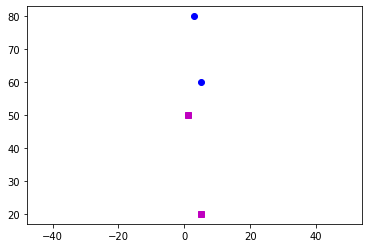

In [4]:
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plt.axis([0, 6, 0, 90])
plt.axis("equal")
plt.show()

# Zad

Wykonaj liniowy algorytm SVC na

* oryginalnych danych
* danych przeskalowanych


In [5]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

SVC(C=100, kernel='linear')

In [6]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

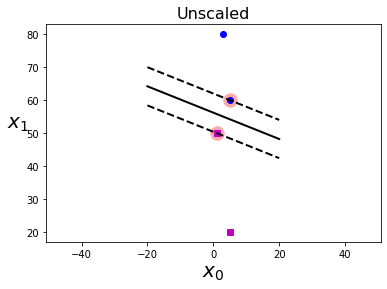

In [7]:
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -20, 20)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])
plt.axis("equal")
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)



SVC(C=100, kernel='linear')

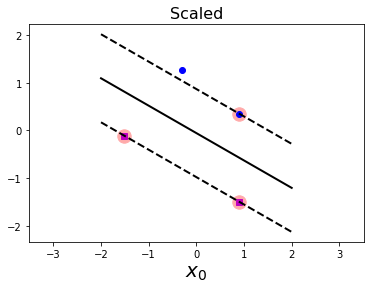

In [9]:
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.axis("equal")
plt.show()

# Zad. 

Wykonaj analogiczne zadanie na damych 

```python
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=.1, random_state=42)
```

wyznacz 

* accuracy
* precision    
* recall  
* f1-score

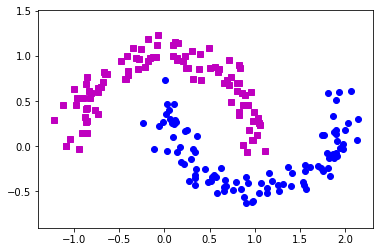

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=.1, random_state=42)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ms")
plt.axis([0, 6, 0, 90])
plt.axis("equal")
plt.show()

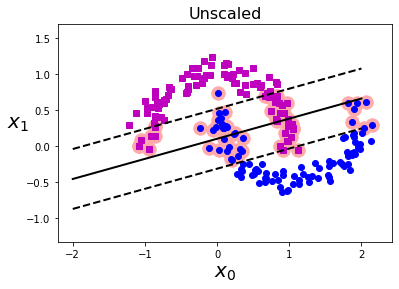

In [11]:
svm_clf = SVC(kernel="linear")
svm_clf.fit(X, y)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis("equal")
plt.show()

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y, y_pred = svm_clf.predict(X) ))#, target_names=["not 5", "5"]))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       100
           1       0.88      0.85      0.86       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y, svm_clf.predict(X))

0.865

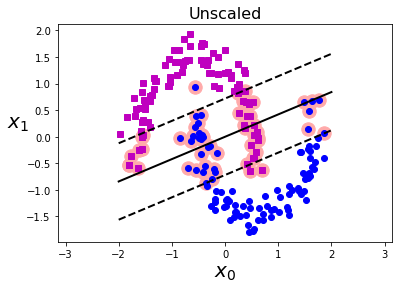

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_clf.fit(X_scaled, y)

plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bo")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis("equal")
plt.show()

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y, svm_clf.predict(X_scaled) ))#, target_names=["not 5", "5"]))

             precision    recall  f1-score   support

          0       0.86      0.88      0.87       100
          1       0.88      0.86      0.87       100

avg / total       0.87      0.87      0.87       200



In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y, svm_clf.predict(X_scaled))

0.87